# Problem statement
**Ques-1: Hi everyone, We are going to predict the income of the individuals with the given Adult dataset. For that we have to first do Exploratory data analysis with the given columns. And we have to remove the outliers and missing values from the dataset. ANd finally we have to preprocess the data and build a Machine leraning model to give salary prediction.**

# Data description
* An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
* This is a widely cited KNN dataset. It is a good starter example for data pre-processing and machine learning practices.
* Fields:<br>
  The dataset contains 16 columns<br>
  Target filed: Income<br>
  -- The income is divide into two classes: 50K<br>
  Number of attributes: 14<br>
  -- These are the demographics and other features to describe a person<br>
* We can explore the possibility in predicting income level based on the individual’s personal information.

# Importing required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Objective
* To perform Univariate and bivariate analysis.
* To find the outliers in each column.
* To Understand the probability and frequency distribution of numeric and categorical columns.
* To identify the patterns between categorical variables using various plots.
* To create various machine learning algorithm and check the efficiency of each model

In [3]:
#loading dataset
df = pd.read_csv("adult.csv")
df.shape

(48842, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Calculating ratio of null values
df.isnull().sum()/df.shape[0]*100

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [8]:
#checking the number of categorical and numerical varibles
cat = df.select_dtypes(include=[np.object])
print("Number of categorical values:",cat.shape[1])
num = df.select_dtypes(include=[np.float64,np.int64])
print("Number of numerical values:",num.shape[1])

Number of categorical values: 9
Number of numerical values: 6


In [9]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [10]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [11]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [12]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [15]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [16]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

# Univariate analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

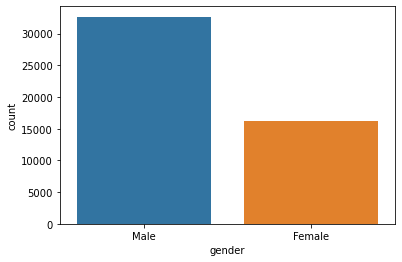

In [17]:
#checking count for gender
sns.countplot(df['gender'])

<AxesSubplot:xlabel='gender', ylabel='age'>

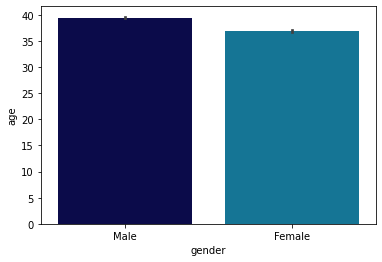

In [18]:
#Plot for gender vs age
sns.barplot(x='gender',y='age',data=df,palette='ocean')

<AxesSubplot:xlabel='race', ylabel='count'>

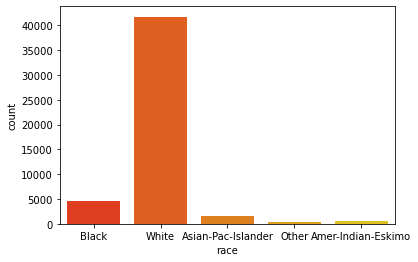

In [19]:
#Count for race
sns.countplot(df['race'],palette='autumn')

<AxesSubplot:>

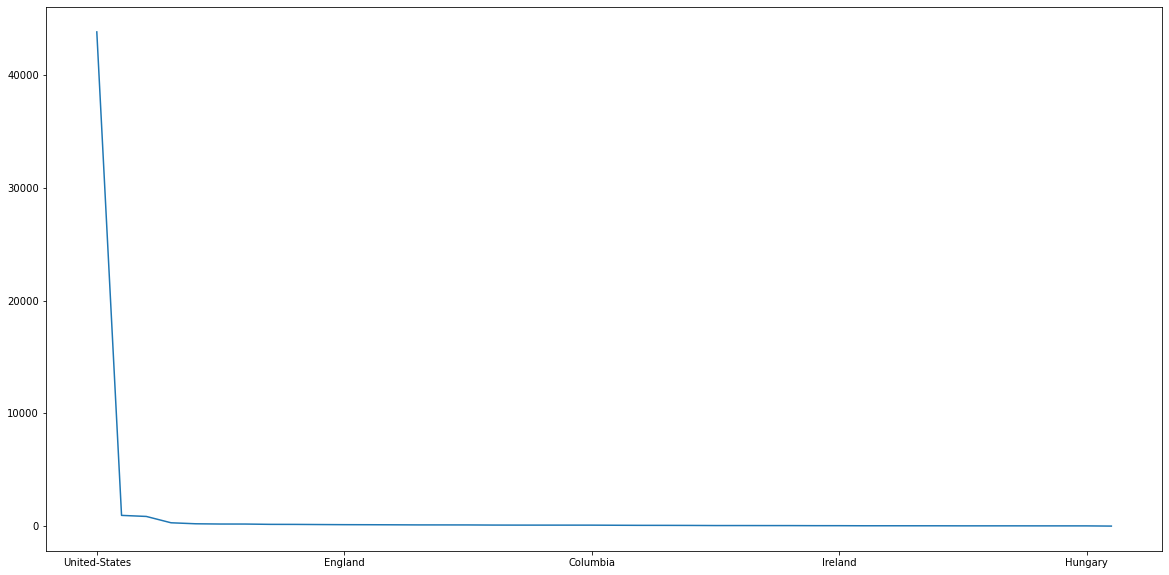

In [20]:
#lineplot for checking natives.
native = df['native-country'].value_counts()
native.plot(kind="line",figsize=(20,10))

<AxesSubplot:xlabel='age'>

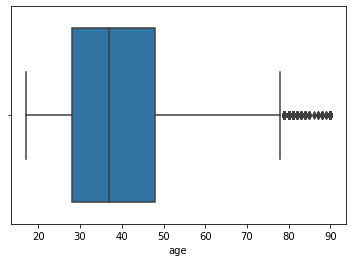

In [21]:
#boxplot for age.
sns.boxplot(df['age'])

<AxesSubplot:xlabel='hours-per-week'>

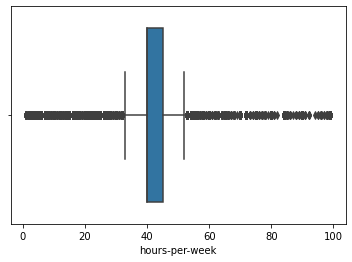

In [22]:
#boxplot for hours per week.
sns.boxplot(df['hours-per-week'])

<AxesSubplot:xlabel='capital-gain'>

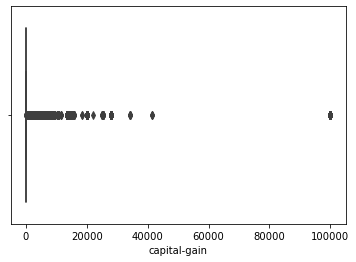

In [23]:
#boxplot for capital-gain
sns.boxplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss'>

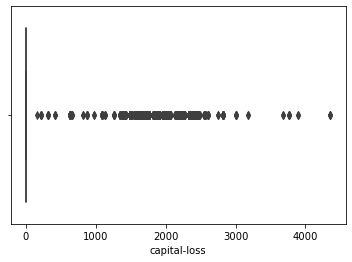

In [24]:
#boxplot for capital-loss
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='educational-num'>

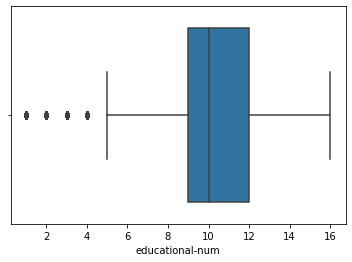

In [25]:
#boxplot for educational number
sns.boxplot(df['educational-num'])

<AxesSubplot:xlabel='fnlwgt'>

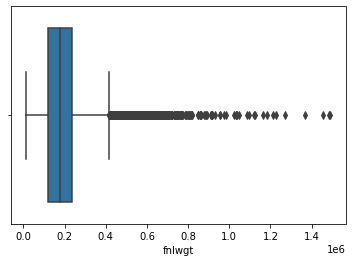

In [26]:
#boxplot for fnlwgt
sns.boxplot(df['fnlwgt'])

<AxesSubplot:xlabel='income', ylabel='count'>

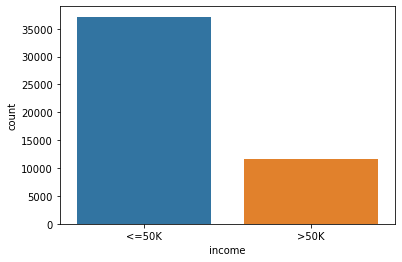

In [27]:
#Countplot for income
sns.countplot(df['income'])

<AxesSubplot:title={'center':'Normal plot for age'}, xlabel='age', ylabel='Density'>

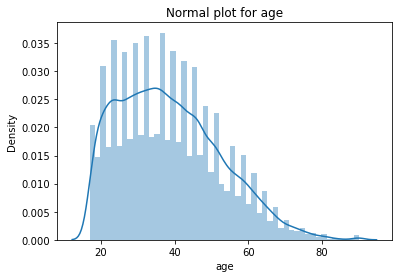

In [28]:
#normal plot for age
plt.title("Normal plot for age")
sns.distplot(df['age'])

((array([-4.18606635, -3.98006955, -3.86775228, ...,  3.86775228,
          3.98006955,  4.18606635]),
  array([17, 17, 17, ..., 90, 90, 90], dtype=int64)),
 (13.480986919346082, 38.64358543876171, 0.9831861941673455))

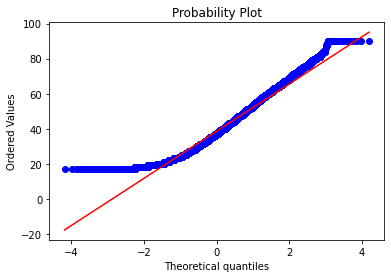

In [29]:
#Q-Q plot for age
plt.title("Q-Q plot for age")
stats.probplot(df['age'],dist="norm",plot=plt)

<AxesSubplot:xlabel='relationship', ylabel='count'>

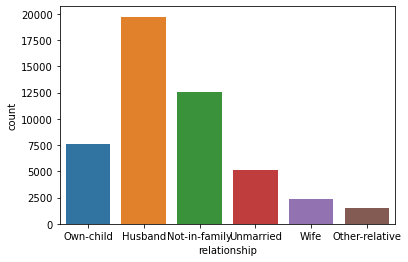

In [30]:
#Countplot for relationship
sns.countplot(df['relationship'])

<AxesSubplot:>

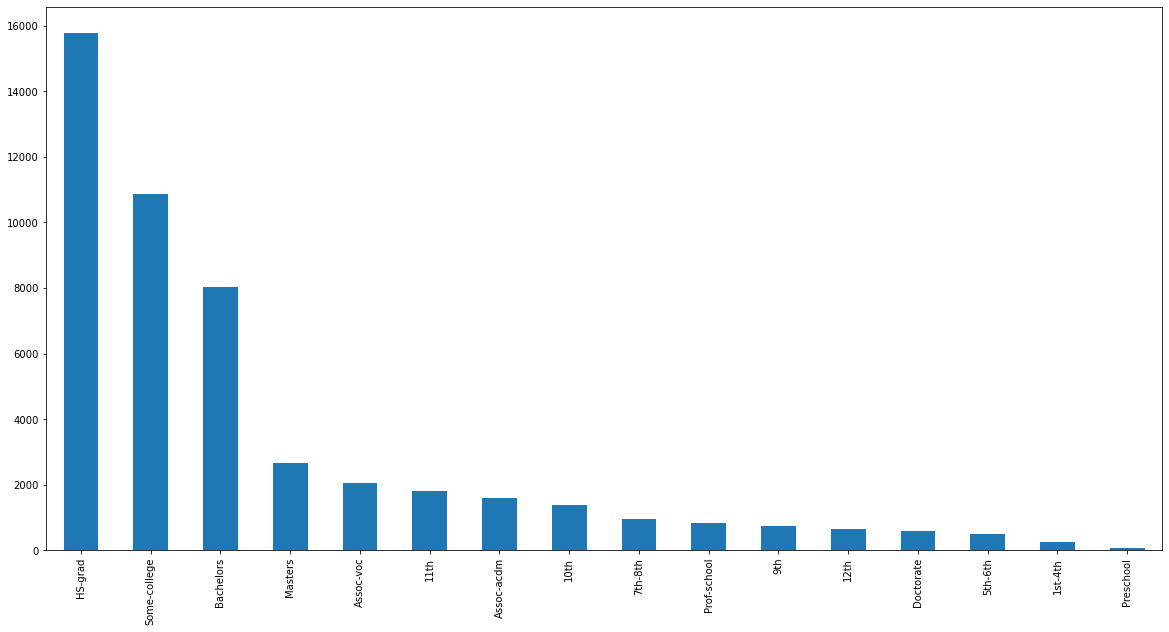

In [31]:
#barplot for education.
edu = df['education'].value_counts()
edu.plot(kind="bar",figsize=(20,10))

<AxesSubplot:ylabel='workclass'>

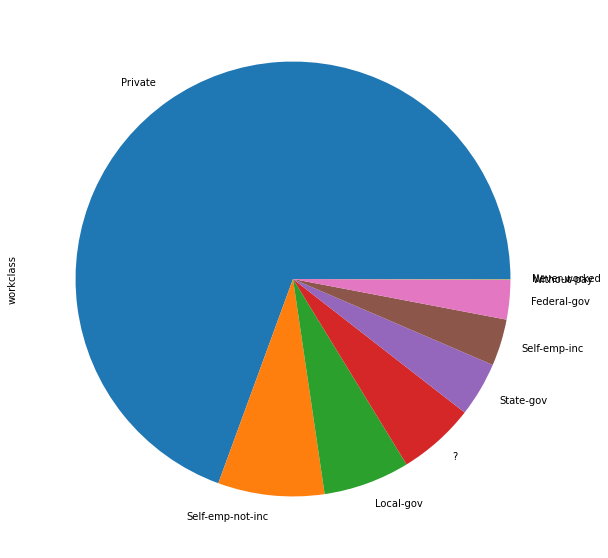

In [32]:
#pie plot for workclass
wc = df['workclass'].value_counts()
wc.plot(kind='pie',figsize=(20,10))

<AxesSubplot:>

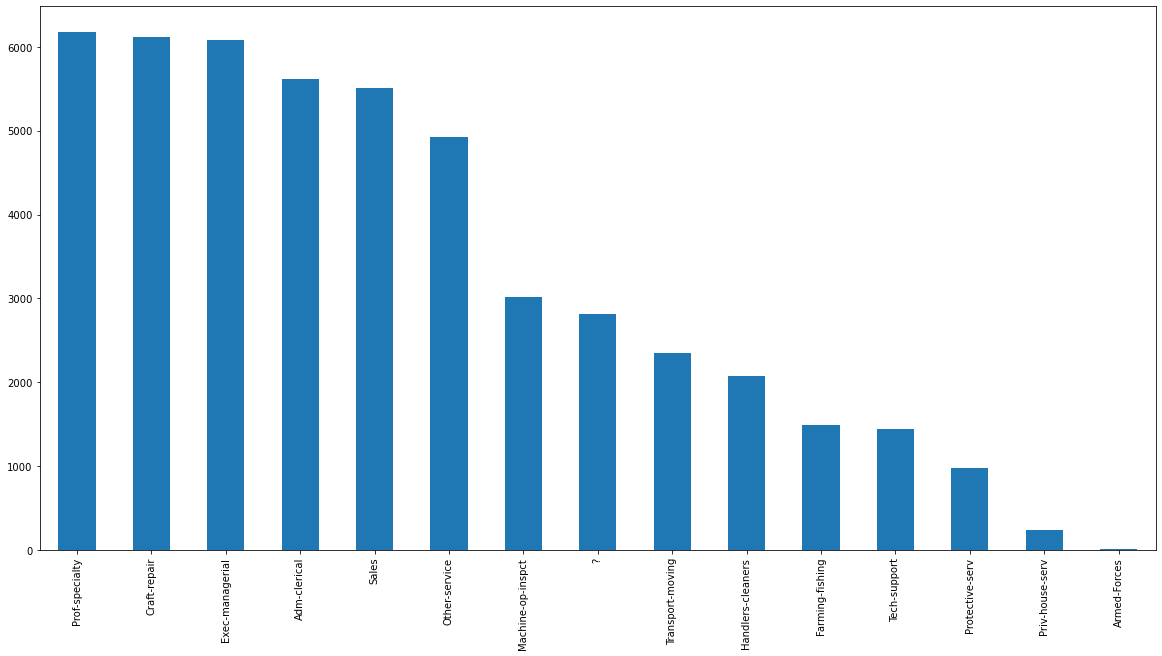

In [33]:
#barplot for occupation
occ = df['occupation'].value_counts()
occ.plot(kind='bar',figsize=(20,10))

# Observations:
* In this dataset, Most of the income earners are male compared to female.
* Maximum age for a men is 40 and for a women is 37.
* The white race people are found to be more compared to other races.
* Most of the people are from USA.
* The age column has positive outliers.
* Atrributes such as capital-gain,capital-loss,educational-num and fnlwgt has so many outliers which has to be treated.
* Most of their income are above 50k.
* Many people completed their High school grade and start working in their specific roles.
* People are working more in private sectors compared to public sectors.
* There are 6 different categories in relationship attribute.
* Many people are found to choosen their profession as prof-speciality.
* Detected many outliers in categorical columns.

# Bivariate analysis:

In [34]:
#Replacing values for income attributes.
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [35]:
df['income'].replace(['<=50K','>50K'],['0','1'],inplace=True)
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='age'>

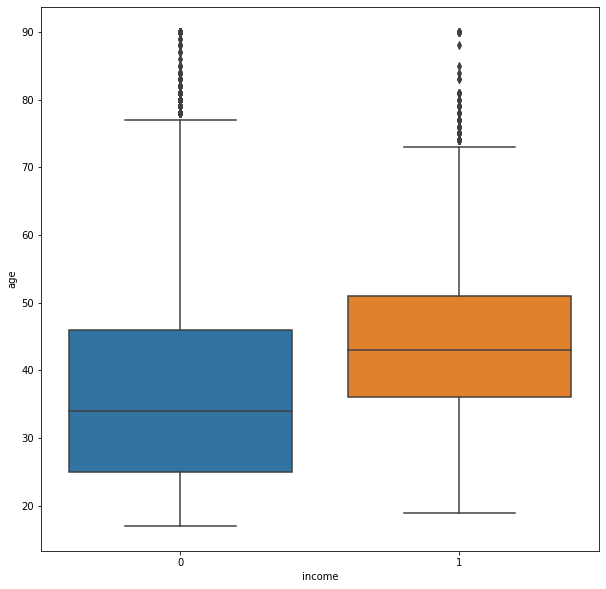

In [36]:
#checking outliers using boxplot
plt.figure(figsize=(10,10))
sns.boxplot(x="income",y='age',data=df)

<AxesSubplot:xlabel='occupation', ylabel='count'>

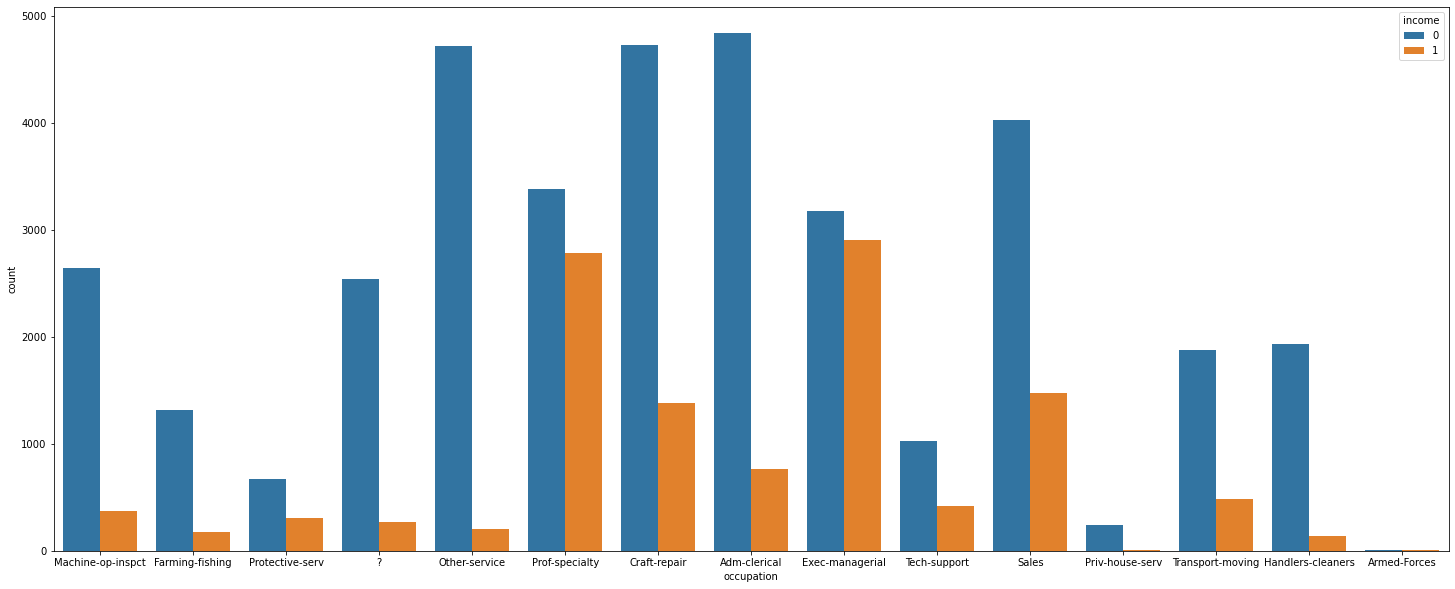

In [37]:
#Checking count for occupation vs income
plt.figure(figsize=(25,10))
sns.countplot(df['occupation'],hue='income',data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

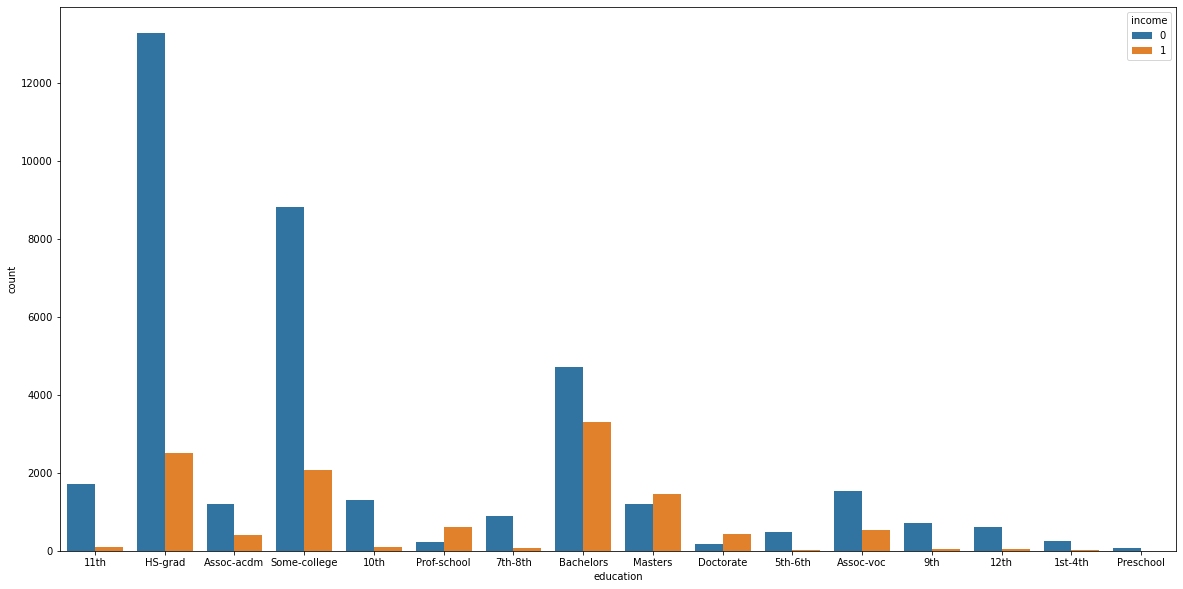

In [38]:
#Checking count for education vs income
plt.figure(figsize=(20,10))
sns.countplot(df['education'],hue='income',data=df)

<AxesSubplot:xlabel='workclass', ylabel='count'>

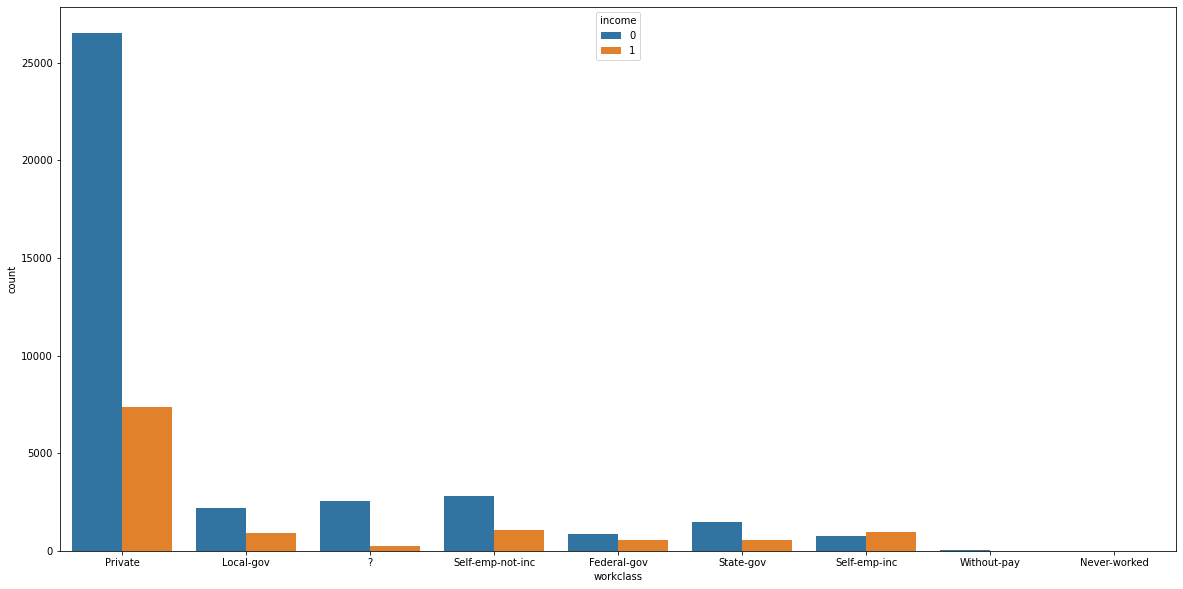

In [39]:
#Checking count for workclass vs income
plt.figure(figsize=(20,10))
sns.countplot(df['workclass'],hue='income',data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

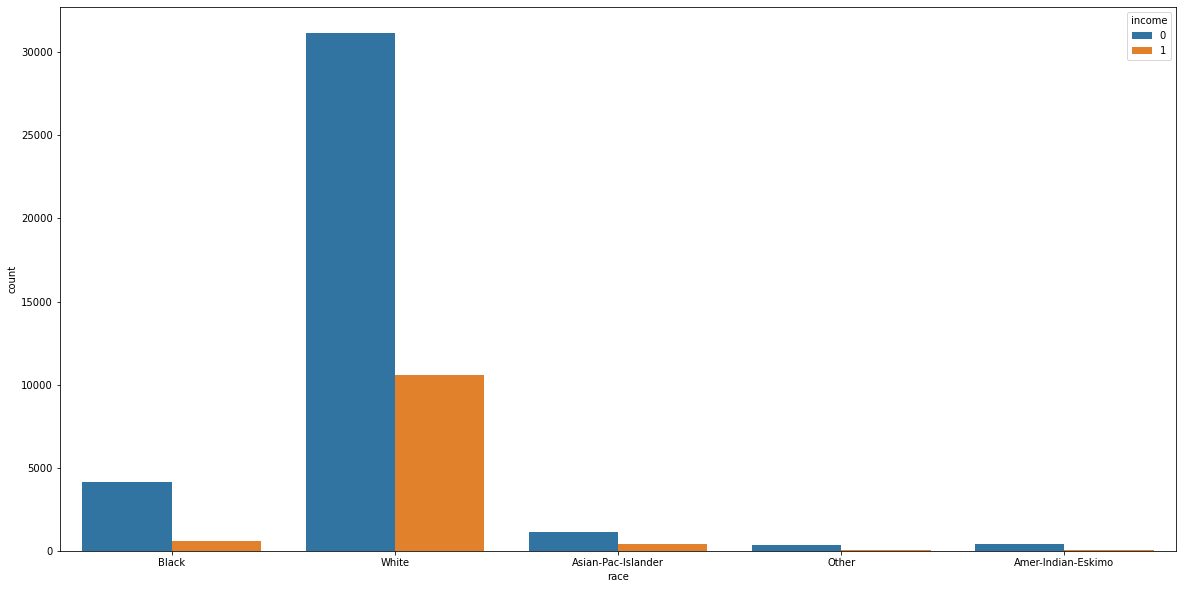

In [40]:
#Checking count for race vs income
plt.figure(figsize=(20,10))
sns.countplot(df['race'],hue='income',data=df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

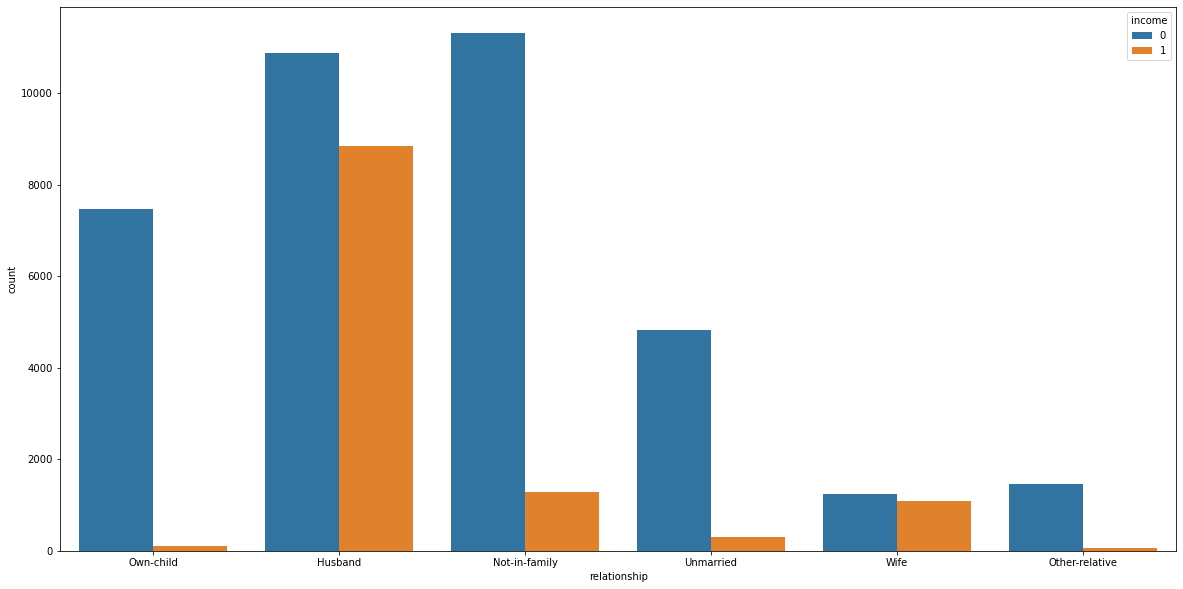

In [41]:
#Checking count for relationship vs income
plt.figure(figsize=(20,10))
sns.countplot(df['relationship'],hue='income',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

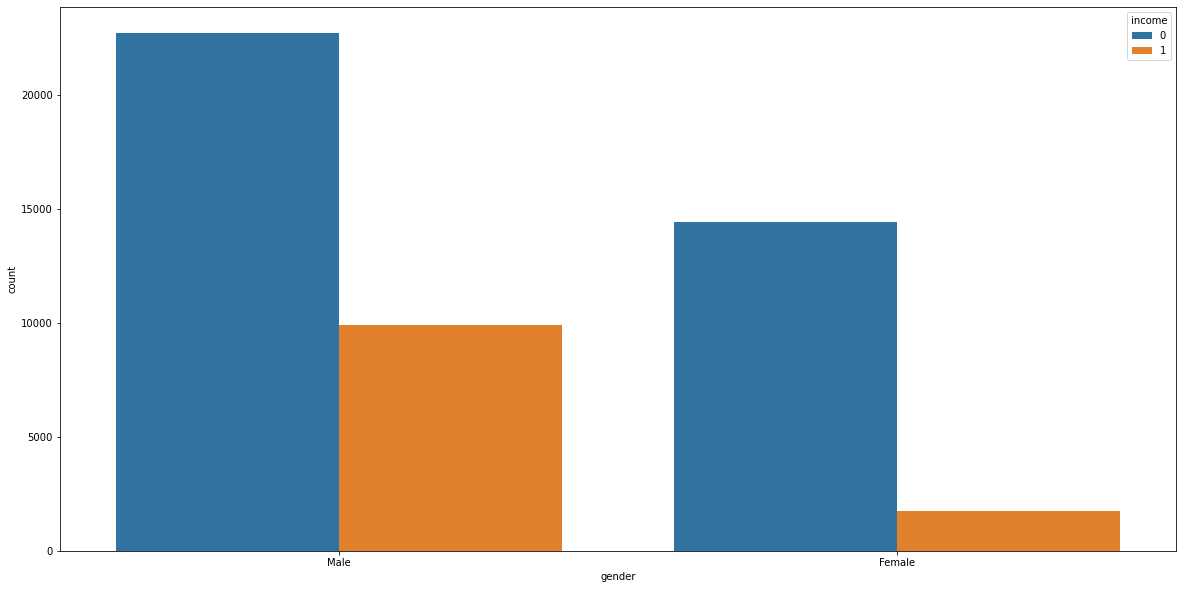

In [42]:
#Checking count for gender vs income
plt.figure(figsize=(20,10))
sns.countplot(df['gender'],hue='income',data=df)

<AxesSubplot:>

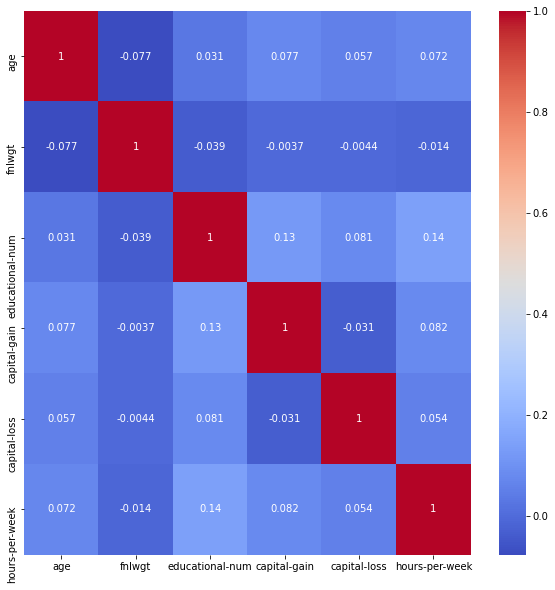

In [43]:
#Correlation for numerical values
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

# Observations:
* The categorical attributes are replaced with numerical attributes for income column.
* Outliers present in both the income group(<=50k and >50k) with respect to "age" attribute.
* Prof-speciality is the highest earning group.
* In private workclass most of the people earn <=50k whereas, self-emp-inc workclass is only where more people earn >50k.
* Interestingly, Most of the people completed their highschool. But very few of them earn more than 50k.
* White race people earn more income than the other race.
* In a family, Husbands are earning more comapring to all other categories.
* For female, Earning more than 50k is very rare. Whereas for male it is comparitvely high.
* Correlation heat map gives the relationship between the numerical attributes. Here, Observing the heatmap it is sure that there is not a good correlation among the numerical values.

# Outlier treatment
**After the exploratory data analysis, it is clear that there are some outliers present in the dataset.We have to clean and replace the values using outlier treatment**

In [44]:
#First we have to replace "?" with the most frequent values in the column.
df['workclass'].replace("?",df['workclass'].mode()[0],inplace=True)
df['occupation'].replace("?",df['occupation'].mode()[0],inplace=True)
df['native-country'].replace("?",df['native-country'].mode()[0],inplace=True)

In [45]:
df['workclass'].value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [46]:
df['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [47]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

# One hot encoding

**Changing values for Gender attribute**

In [48]:
#replacing gender values
df['gender'].replace(['Male','Female'],['0','1'],inplace=True)

In [49]:
df['gender'].value_counts()

0    32650
1    16192
Name: gender, dtype: int64

**Categorise Workclass attribute**

In [50]:
#converting the work class values.
df['workclass'].replace(['Private','Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay','Never-worked'],\
                       ['Private','Self emp','Gov','Gov','Self emp','Gov','Without-pay','Never-worked'],inplace=True)

In [51]:
#Hot coding the values.
work_map={'Private':'0','Gov':'1','Self emp':'2','Without-pay':'3','Never-worked':'4'}
df['workclass']=df['workclass'].map(work_map)

**Categorise Marital-Status attribute**

In [52]:
#Converting Marital values.
df['marital-status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],\
                             ['Married','Single','Single','Single','Single','Single','Married'],inplace=True)

In [53]:
#Hot encoding the values.
mar_map = {'Single':'0','Married':'1'}
df['marital-status']=df['marital-status'].map(mar_map)

**Encoding Relationship attribute**

In [54]:
#Encoding the relationship values
rel_map = {'Husband':'0','Not-in-family':'1','Own-child':'2','Unmarried':'3','Wife':'4','Other-relative':'5'}
df['relationship']=df['relationship'].map(rel_map)

**Encoding Race attribute**

In [55]:
#Encoding race attributes.
race_map = {'White':'0','Black':'1','Asian-Pac-Islander':'2','Amer-Indian-Eskimo':'3','Other':'4'}
df['race'] = df['race'].map(race_map)

**Dropping unwanted column for model building**

In [56]:
#removing unwanted attributes.
df.drop(['education','occupation'],axis=1,inplace=True)

**Coding Capital value attributes**

In [57]:
#replacing values in capital-gain and capital-loss
df.loc[(df['capital-gain']>0),'capital-gain']=1
df.loc[(df['capital-gain']==0),'capital-gain']=0

df.loc[(df['capital-loss']>0),'capital-loss']=1
df.loc[(df['capital-loss']==0),'capital-loss']=0

**Changing the native-country attribute**

In [58]:
nat_map=\
{'United-States':'US',
'Mexico':'Non-US',
'Philippines': 'Non-US',                    
'Germany':'Non-US',                         
'Puerto-Rico':'Non-US',                     
'Canada':'Non-US',                          
'El-Salvador':'Non-US',                     
'India':'Non-US',                           
'Cuba':'Non-US',                            
'England':'Non-US',                         
'China':'Non-US',                           
'South':'Non-US',                           
'Jamaica':'Non-US',                         
'Italy':'Non-US',                           
'Dominican-Republic':'Non-US',              
'Japan':'Non-US',                            
'Guatemala':'Non-US',                        
'Poland':'Non-US',                           
'Vietnam':'Non-US',                          
'Columbia':'Non-US',                         
'Haiti':'Non-US',                           
'Portugal':'Non-US',                         
'Taiwan':'Non-US',                           
'Iran':'Non-US',                            
'Greece':'Non-US',                           
'Nicaragua':'Non-US',                        
'Peru':'Non-US',                             
'Ecuador':'Non-US',                          
'France':'Non-US',                           
'Ireland':'Non-US',                          
'Hong':'Non-US',                            
'Thailand':'Non-US',                         
'Cambodia':'Non-US' ,                        
'Trinadad&Tobago':'Non-US',                  
'Laos':'Non-US',                             
'Outlying-US(Guam-USVI-etc)':'Non-US',       
'Yugoslavia':'Non-US',                       
'Scotland':'Non-US',                         
'Honduras':'Non-US',                         
'Hungary':'Non-US' ,                         
'Holand-Netherlands':'Non-US'}

In [59]:
df['native-country']=df['native-country'].map(nat_map)

In [60]:
df['native-country'].value_counts()

US        44689
Non-US     4153
Name: native-country, dtype: int64

In [61]:
df['native-country'].replace(['Non-US','US'],['0','1'],inplace=True)

# Fully transformed dataset:

In [62]:
df.head(20)

,age,workclass,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,7,0,2,1,0,0,0,40,1,0
1,38,0,89814,9,1,0,0,0,0,0,50,1,0
2,28,1,336951,12,1,0,0,0,0,0,40,1,1
3,44,0,160323,10,1,0,1,0,1,0,40,1,1
4,18,0,103497,10,0,2,0,1,0,0,30,1,0
5,34,0,198693,6,0,1,0,0,0,0,30,1,0
6,29,0,227026,9,0,3,1,0,0,0,40,1,0
7,63,2,104626,15,1,0,0,0,1,0,32,1,1
8,24,0,369667,10,0,3,0,1,0,0,40,1,0
9,55,0,104996,4,1,0,0,0,0,0,10,1,0


# Data preparation

In [63]:
target = df['income']
data = df.drop("income",axis=1)

In [64]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,0,226802,7,0,2,1,0,0,0,40,1
1,38,0,89814,9,1,0,0,0,0,0,50,1
2,28,1,336951,12,1,0,0,0,0,0,40,1
3,44,0,160323,10,1,0,1,0,1,0,40,1
4,18,0,103497,10,0,2,0,1,0,0,30,1


In [65]:
target.shape

(48842,)

In [66]:
data.shape

(48842, 12)

In [67]:
#Data standardization
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)

In [68]:
std_data.shape

(48842, 12)

# Applying model for training:
**Dividing into train and test data**

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(std_data,target,test_size=0.25,random_state=0)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36631, 12)
(12211, 12)
(36631,)
(12211,)


# 1. Training using Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(x_train,y_train)

LogisticRegression()

# Prediction and Accuracy of Logistic regression

In [72]:
y_pred = classifier1.predict(x_test)

In [73]:
#Checking accuracy
from sklearn import metrics
a1=metrics.accuracy_score(y_test,y_pred)
a1

0.8337564491032675

# 2. Training using Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(x_train,y_train)

RandomForestClassifier()

# Prediction and Accuracy of Random Forest Classifier

In [75]:
y_pred = classifier2.predict(x_test)

In [76]:
a2=metrics.accuracy_score(y_test,y_pred)
a2

0.8272049791171894

# 3. Training using Support vector machines

In [77]:
from sklearn.svm import SVC
classifier3 = SVC()
classifier3.fit(x_train,y_train)

SVC()

# Prediction and Accuracy using Support vector Machines

In [78]:
y_pred = classifier3.predict(x_test)

In [79]:
a3=metrics.accuracy_score(y_test,y_pred)
a3

0.8395708787159119

# 4. Training using Decision tree classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier()
classifier4.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction and accuracy using Decision tree classifier

In [81]:
y_pred = classifier4.predict(x_test)

In [82]:
a4=metrics.accuracy_score(y_test,y_pred)
a4

0.7809352223405126

# 5.Training using Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(x_train,y_train)

GaussianNB()

# Prediction and accuracy using Naive Bayes

In [84]:
y_pred = classifier5.predict(x_test)

In [85]:
a5=metrics.accuracy_score(y_test,y_pred)
a5

0.7961673900581443

# 6. Training using Neural networks

In [86]:
from sklearn.neural_network import MLPClassifier
classifier6 = MLPClassifier()
classifier6.fit(x_train,y_train)

MLPClassifier()

# Prediction and accuracy using Neural networks

In [87]:
y_pred = classifier6.predict(x_test)

In [88]:
a6=metrics.accuracy_score(y_test,y_pred)
a6

0.83940709196626

# Conclusion:

In [89]:
models = {'Model':['Logistic Regression','Support vector machines','Random Forest Classifier',\
                   'Naive Bayes','Decision Tree classifier','Neural networks'],\
         'Accuracy':[a1*100,a3*100,a2*100,a5*100,a4*100,a6*100]}
tab = pd.DataFrame(models,columns=['Model','Accuracy'])
print(tab)

                      Model   Accuracy
0       Logistic Regression  83.375645
1   Support vector machines  83.957088
2  Random Forest Classifier  82.720498
3               Naive Bayes  79.616739
4  Decision Tree classifier  78.093522
5           Neural networks  83.940709


**Points to note:**
* 6 different classifier models are used to predict the income attributes.
* The first model is Logistic Regression.
* It gives an accuracy of 83 percentage and also performing good.
* The next model is Support Vector Machine.
* It gives an high accuracy of 83.95 percentage, a very good performing model.
* The next model is Random Forest Classifier.
* It gives an accuracy of 82.5 percentage, performing resonably good.
* The next model is Naive Bayes.
* It gives an accuracy of only 79 percentage.
* The next model is Decision Tree classifier.
* It gives an accuracy of only 78 percentage.
* Our Last and final model is Neural networks.
* It gives an High accuracy of 83.94 percentage comparing to other working models.
* From the table, It is clear that SVM and Neural Network has high accuracy,whereas Logistic regression and RFC has approximately equal accuracy.
* Naive bayes and Decison tree algorithm produces low accuracy compared to other algorithms.

# Learnings from research paper:
* The research papers helped me to understand about outliers and missing value treatment.
* I came to know about the normalization and standardization of the dataset, which results in more accuracy in creating model.
* After doing the above mentioned steps, I got an accuracy of 84 percentage in neural network classifier model.
* In the second research paper, I came to know about the importance of using Data visualization as a tool to detect the outliers.
* It also helps me to understand Data Preprocessing techniques such as Handling missing values, encoding categorical and numerical values.
* From this I learned how to manage, treat outliers and earned some valuable insights to use algorithm suitable for the dataset.

# Reference:
* [Research paper-1](https://drive.google.com/file/d/1rfTR8bgYPSV8LlpPpsMNBTa4FM2LafZ6/view?usp=sharing)
* [Research paper-2](https://drive.google.com/file/d/1nXBcKeYFtgQvGjj2QxYngn7zvqKAB12f/view?usp=sharing)
* [Outliers-The silent killers](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer)